# Using Node2Vec to learn presentation and cluster nodes in the Les Miserables network

The network has 77 nodes and 254 edges where nodes correspond to characters in the novel Les Misérables and edges connect coappearing characters.

## Importing the libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## Creating the network using networkx

In [2]:
nx_G = nx.les_miserables_graph()

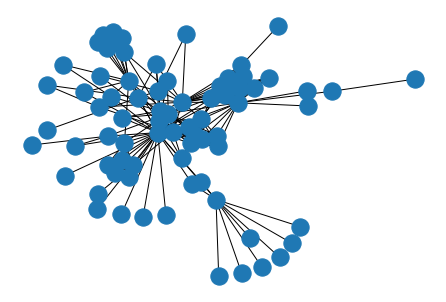

In [3]:
nx.draw(nx_G)

In [4]:
nx_G.nodes()

NodeView(('Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

In [5]:
nx_G['Napoleon']

AtlasView({'Myriel': {'weight': 1}})

## Using node2vec to learn representation and cluster the nodes in the network

In [6]:
from node2vec import Graph

### Using node2vec to cluster nodes based on homophily

In [7]:
# Parameters
p = 1    # Return parameter
q = 0.5  # In out parameter
r = 100  # Number of walks per nodes
l = 3    # Length of a walk
d = 16   # Size of feature representation
k = 3    # Context size

G = Graph(nx_G, is_directed=False, p=p, q=q)

In [8]:
G.preprocess_transition_probs()
walks = G.simulate_walks(num_walks=r, walk_length=l)

Walk iteration:
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


In [9]:
walks = [list(map(str, walk)) for walk in walks]

In [10]:
from gensim.models import Word2Vec

In [11]:
model = Word2Vec(walks, size=d, window=k, min_count=0, sg=1, workers=1, iter=10)

In [12]:
model.wv.save_word2vec_format('emb/les_miserables_1.emb')

In [13]:
nodes = pd.read_csv('emb/les_miserables_1.emb', skiprows=range(0, 1), sep=' ', header=None)

In [14]:
nodes = nodes.sort_values(by=0).reset_index(drop=True)

In [15]:
nodes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Anzelma,0.056976,-0.029652,0.548357,-0.059835,-0.691415,-0.054614,0.606886,-0.496603,-0.224169,-0.109508,0.383157,-0.283128,0.295437,0.192069,-0.186613,0.183546
1,Babet,0.001405,-0.294527,0.656881,-0.046227,-0.832624,-0.086769,0.578477,-0.547707,-0.312655,-0.077390,0.583979,-0.321707,0.388882,0.058150,-0.204153,0.271903
2,Bahorel,0.050429,0.982993,0.321443,0.563879,-0.934883,0.346555,0.695638,-0.347094,0.550860,0.243031,0.162547,0.070266,0.696808,-0.018078,0.264326,0.725436
3,Bamatabois,0.032121,-0.191532,0.799308,-0.528696,-0.776828,-0.544249,0.497880,-0.137138,0.163589,-0.563908,1.042663,-0.531196,0.312859,0.132027,-0.494941,-0.097457
4,BaronessT,0.529731,0.661771,0.379419,-0.199760,-0.611555,-0.220533,0.510861,-0.337156,-0.144649,-0.037961,-0.115939,-0.004348,0.417121,0.472925,-0.315572,0.159076


### Using KMeans algorithms to cluster the nodes

In [16]:
from sklearn.cluster import KMeans

In [17]:
cluster = KMeans(n_clusters=5)

In [18]:
cluster.fit(nodes.iloc[:, 1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
cluster.labels_

array([0, 0, 1, 4, 0, 3, 1, 0, 4, 0, 4, 2, 4, 1, 1, 0, 4, 1, 0, 2, 2, 1,
       2, 3, 1, 0, 3, 3, 0, 3, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 4, 0,
       3, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 3,
       0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3], dtype=int32)

### Visualization of learned clusters

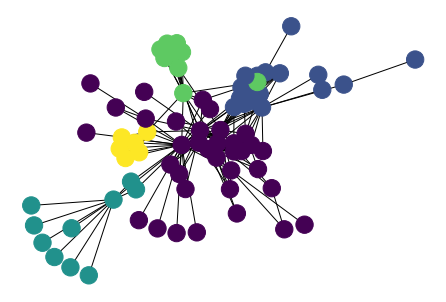

In [20]:
pos = nx.drawing.layout.spring_layout(nx_G)
nx.draw(nx_G, pos=pos, with_labels=False, nodelist=sorted(nx_G.nodes()), node_color=cluster.labels_, scales=1.5)

### Using node2vec to cluster nodes based on structural equivalence

In [21]:
# Parameters
p = 1    # Return parameter
q = 2  # In out parameter
r = 100  # Number of walks per nodes
l = 3    # Length of a walk
d = 16   # Size of feature representation
k = 3    # Context size

G = Graph(nx_G, is_directed=False, p=p, q=q)

In [22]:
G.preprocess_transition_probs()
walks = G.simulate_walks(num_walks=r, walk_length=l)

Walk iteration:
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


In [23]:
walks = [list(map(str, walk)) for walk in walks]

In [24]:
model = Word2Vec(walks, size=d, window=k, min_count=0, sg=1, workers=1, iter=3)

In [25]:
model.wv.save_word2vec_format('emb/les_miserables_2.emb')

In [26]:
nodes = pd.read_csv('emb/les_miserables_2.emb', skiprows=range(0, 1), sep=' ', header=None)

In [27]:
nodes = nodes.sort_values(by=0).reset_index(drop=True)

In [28]:
nodes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Anzelma,-0.092987,0.082513,0.181663,-0.027583,-0.417223,0.009802,0.314039,-0.110254,-0.036933,-0.034358,0.297627,-0.183130,0.186844,0.288493,-0.217014,0.157619
1,Babet,-0.119652,0.070613,0.223291,-0.039922,-0.561940,-0.003034,0.355963,-0.118413,-0.019308,-0.019519,0.394273,-0.190492,0.295676,0.342191,-0.315115,0.261425
2,Bahorel,-0.090773,0.140861,0.220019,-0.031333,-0.486464,0.031752,0.357697,-0.133195,0.001018,-0.051338,0.330448,-0.169573,0.234943,0.311221,-0.282623,0.215346
3,Bamatabois,-0.092204,0.085080,0.204448,-0.042437,-0.414130,-0.029713,0.300021,-0.073049,-0.008580,-0.034429,0.340268,-0.188943,0.193247,0.264716,-0.233315,0.169701
4,BaronessT,-0.009860,0.094167,0.115020,-0.021447,-0.304806,-0.010396,0.199371,-0.039254,-0.035358,-0.020005,0.174881,-0.106966,0.160950,0.191779,-0.124157,0.114889


### Using KMeans algorithms to cluster the nodes

In [29]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(nodes.iloc[:, 1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
cluster.labels_

array([0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0], dtype=int32)

### Visualization of learned clusters

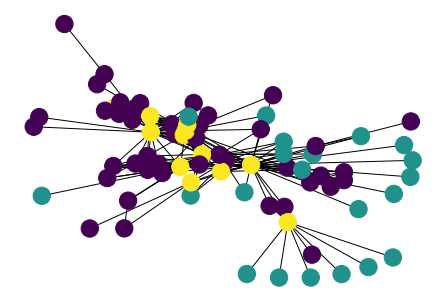

In [31]:
pos = nx.drawing.layout.spring_layout(nx_G)
nx.draw(nx_G, pos=pos, with_labels=False, nodelist=sorted(nx_G.nodes()), node_color=cluster.labels_)